## aula 03 - PYTHON
Nesta aula veremos:

1-Numpy arrays e pandas Dataframes
2-Open and export files
3-Conditional Statements
4-Loops em Python
5-Functions - def

## 1.1 Numpy arrays



In [7]:
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.83795908 0.94047927]
 [0.67533882 0.11346063]
 [0.14270427 0.9887553 ]
 [0.33085118 0.56028647]
 [0.68270227 0.89798184]
 [0.94365568 0.71676787]
 [0.45721301 0.33277604]
 [0.85583027 0.51458172]
 [0.5788083  0.33816037]
 [0.23811806 0.1727985 ]]
(10, 2)


In [8]:
# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[839.57948773 941.07447269]
 [678.58543415 122.32602123]
 [151.27722293 988.86774379]
 [337.54266445 564.683602  ]
 [685.87524529 899.00202458]
 [944.21912169 719.60019405]
 [462.64088311 339.44828022]
 [857.27196321 519.43590255]
 [583.02021762 344.77876801]
 [245.73688303 181.07051359]]


<class 'numpy.ndarray'>


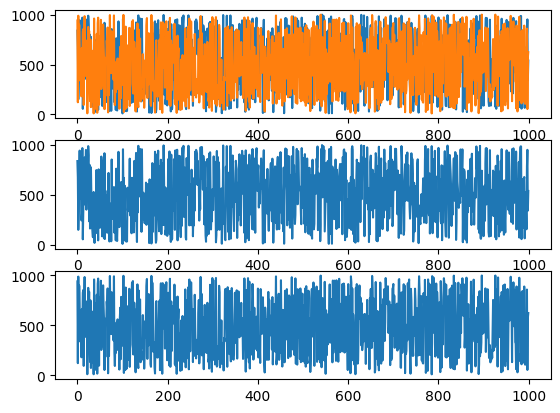

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [10]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.36549125 0.28147473 0.39860037 ... 0.02433969 0.08595277 0.46832068]
 [0.59519664 0.31870954 0.31897813 ... 0.34169299 0.11373702 0.6691632 ]
 [0.27665731 0.13260461 0.08076754 ... 0.04671688 0.82069062 0.00540789]
 ...
 [0.79857061 0.32360747 0.43585723 ... 0.32358479 0.02879399 0.14924077]
 [0.04788343 0.72466966 0.61363547 ... 0.67870314 0.7224477  0.68658118]
 [0.0707165  0.0137243  0.61762264 ... 0.69129607 0.03995047 0.43634924]]


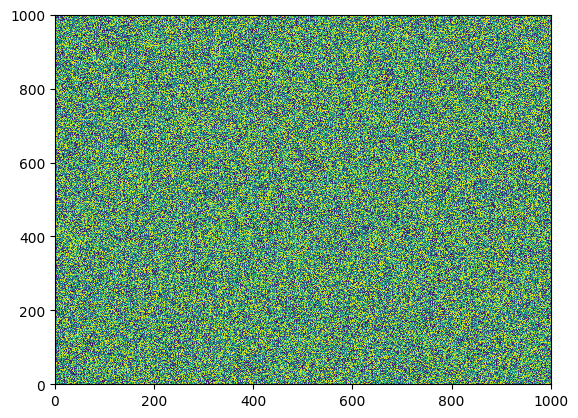

In [11]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [12]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


## PANDAS


In [13]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [14]:
# Monstrando um dataframe
df['datetime'] = dtime

In [15]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [16]:
df['random'][1:10]

1    0.843160
2    0.627255
3    0.684272
4    0.983728
5    0.970415
6    0.154765
7    0.899156
8    0.698871
9    0.131232
Name: random, dtype: float64

In [17]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [18]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.003235
2022-01-01 01:00:00,2022-01-01 01:00:00,0.843160
2022-01-01 02:00:00,2022-01-01 02:00:00,0.627255
2022-01-01 03:00:00,2022-01-01 03:00:00,0.684272
2022-01-01 04:00:00,2022-01-01 04:00:00,0.983728
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.817778
2022-12-31 20:00:00,2022-12-31 20:00:00,0.399779
2022-12-31 21:00:00,2022-12-31 21:00:00,0.191204


In [19]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

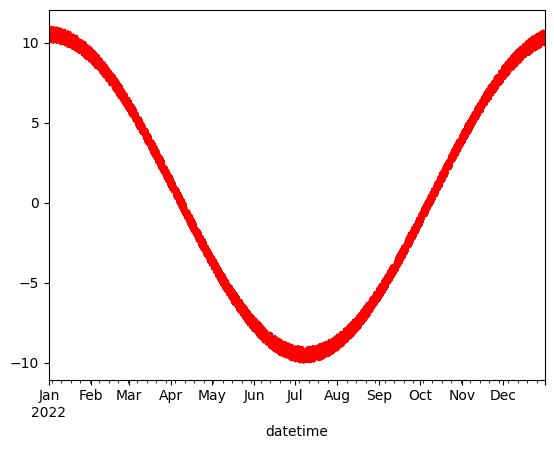

In [20]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [21]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.003235,2022,1,1,1.000000,10.003235
2022-01-01 01:00:00,2022-01-01 01:00:00,0.843160,2022,1,1,1.000000,10.843158
2022-01-01 02:00:00,2022-01-01 02:00:00,0.627255,2022,1,1,0.999999,10.627246
2022-01-01 03:00:00,2022-01-01 03:00:00,0.684272,2022,1,1,0.999998,10.684251
2022-01-01 04:00:00,2022-01-01 04:00:00,0.983728,2022,1,1,0.999996,10.983689
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.817778,2022,12,31,0.979401,10.611786
2022-12-31 20:00:00,2022-12-31 20:00:00,0.399779,2022,12,31,0.979541,10.195186
2022-12-31 21:00:00,2022-12-31 21:00:00,0.191204,2022,12,31,0.979680,9.988007


In [22]:
# Salvar meu dataframe

df.to_csv(r'C:\Users\sergi\OneDrive\Documentos\GitHub\ENS5173_202401/noise_2022.csv')

In [23]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


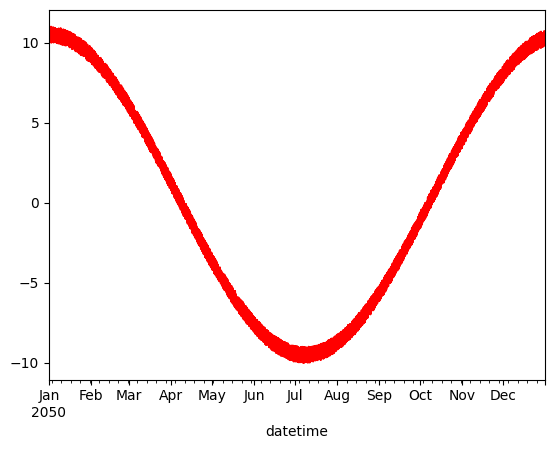

In [26]:
path ='C:/Users/sergi/OneDrive/Documentos/GitHub/ENS5173_202401/'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


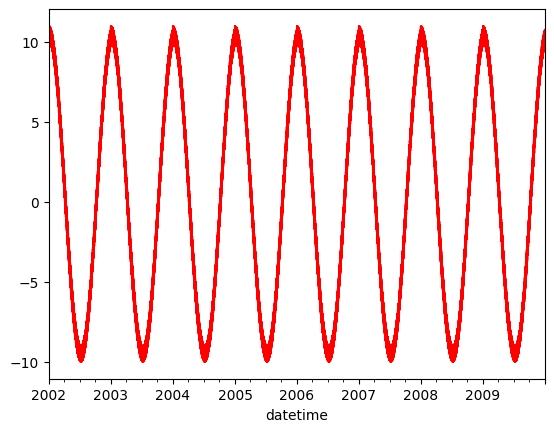

In [27]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [28]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.855810,1.000000,10.855810
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.912074,1.000000,10.912071
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.567990,0.999999,10.567980
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.420285,0.999998,10.420263
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.058003,0.999996,10.057964
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.360235,0.979401,10.154242
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.223527,0.979541,10.018934
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.702522,0.979680,10.499325


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


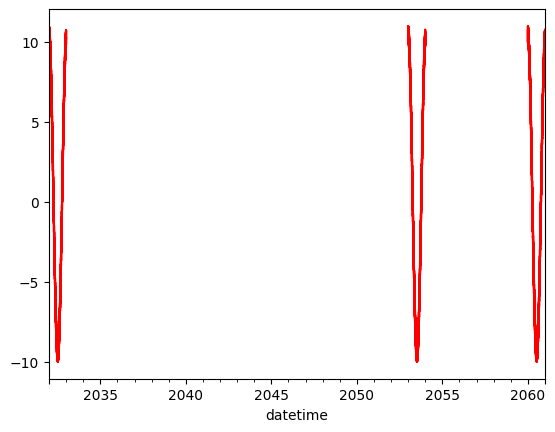

In [29]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [30]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['.git', '.gitignore', 'Aula01.ipynb', 'Aula02.ipynb', 'inputs', 'noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2022.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv', 'README.md', 'scripts', 'shapefile', 'vend', 'venv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2022.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [31]:
allDataDf = pd.concat(allData)


In [32]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.415876,1.000000,10.415876
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.194085,1.000000,10.194083
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.189460,0.999999,10.189450
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.837426,0.999998,10.837404
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.684344,0.999996,10.684306
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.767839,0.982630,10.594139
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.445030,0.982759,10.272616
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.885493,0.982887,10.714361
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.247831,0.983014,10.077976


In [ ]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])